In [1]:
!pip install -q seaborn scikit-learn matplotlib pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/house_price_data.csv')

print("Information:")
df.info()
print("\nShape:")
print(df.shape)
print("\nNull Values:")
print(df.isnull().sum())
print("\nSummary")
df.describe()

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-null   int64  
 14  balcony    

,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,floors,garage,garden,basement,balcony,air_conditioning,parking_spaces,listing_duration,year_sold,sale_price
count,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3.785213,337.536250,148.724875,1.0,14.295125,150.608125,3.359500,2.502875,1.808250,0.698000,0.598875,0.389625,0.504375,0.40050,1.400375,29.411625,2021.591625,725.181400
std,3.953137,350.469891,165.435271,0.0,14.677669,83.534599,1.129345,0.802074,0.600231,0.459154,0.490157,0.487696,0.500012,0.49003,0.922730,29.499529,1.065597,350.856932
min,0.500000,50.000000,30.000000,1.0,0.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2020.000000,80.000000
25%,1.000000,94.750000,35.000000,1.0,4.000000,86.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,8.000000,2021.000000,416.375000
50%,2.500000,221.000000,90.000000,1.0,10.000000,134.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,20.000000,2022.000000,684.600000
75%,5.100000,455.000000,194.000000,1.0,20.000000,196.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,42.000000,2022.000000,1108.375000
max,25.000000,3000.000000,1748.000000,1.0,100.000000,500.000000,6.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,200.000000,2023.000000,1200.000000


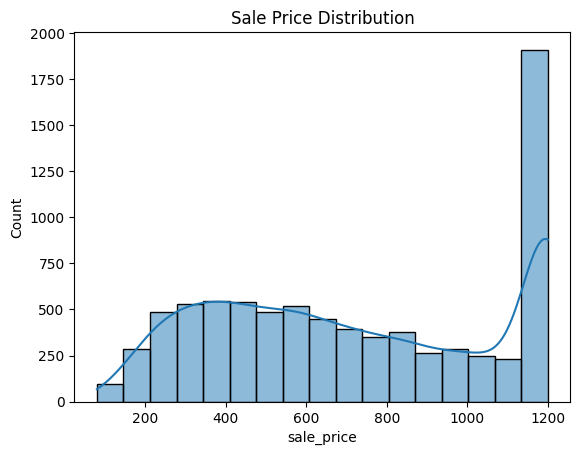

Skewness: 0.07300029773629817


In [4]:
sns.histplot(df['sale_price'], kde=True)
plt.title("Sale Price Distribution")
plt.show()

print("Skewness:", df['sale_price'].skew())

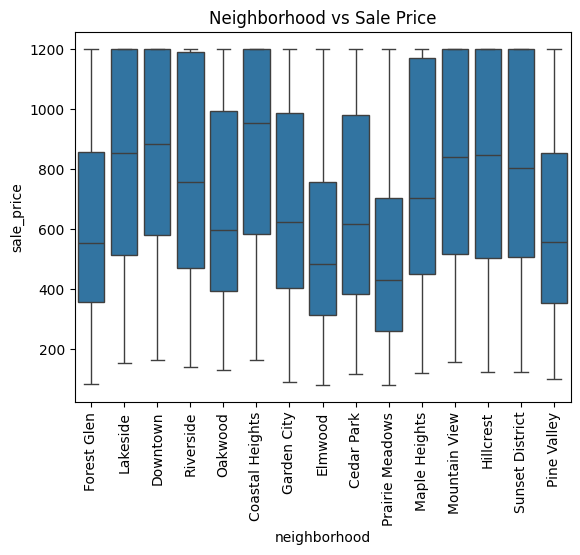

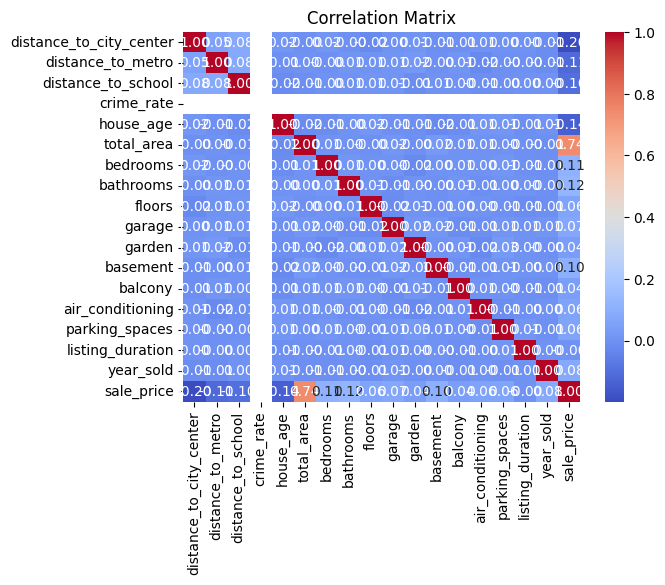

In [5]:
if 'neighborhood' in df.columns:
    sns.boxplot(x='neighborhood', y='sale_price', data=df)
    plt.xticks(rotation=90)
    plt.title("Neighborhood vs Sale Price")
    plt.show()

corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
df = df.dropna()

for col in df.select_dtypes('object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('sale_price', axis=1)
y = df['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 152.11185570066823
MSE: 35959.38611483348
RMSE: 189.62960242228397
R-squared: 0.7047546705883286


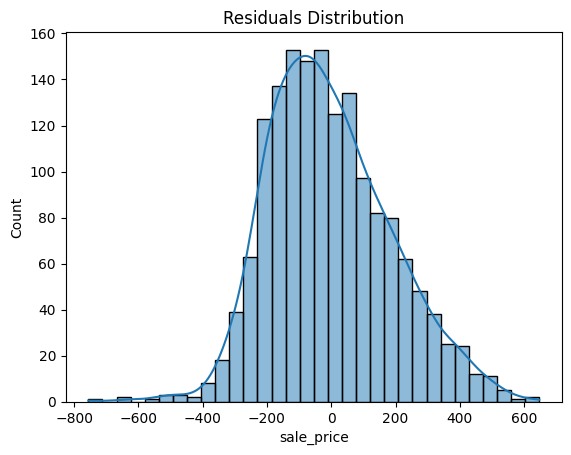

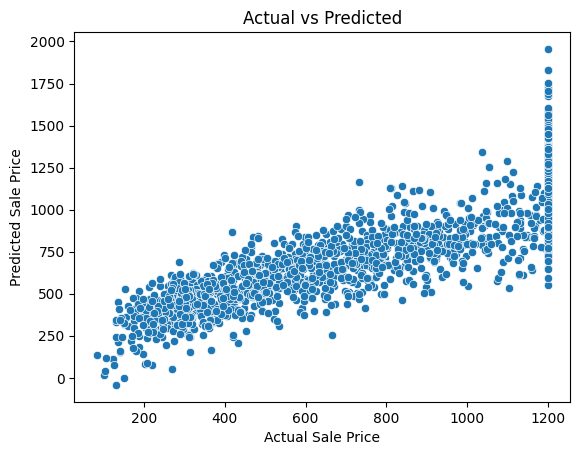

In [9]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted")
plt.show()